In [1]:
# Importing libraries for ARIMA model and data manipulation
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


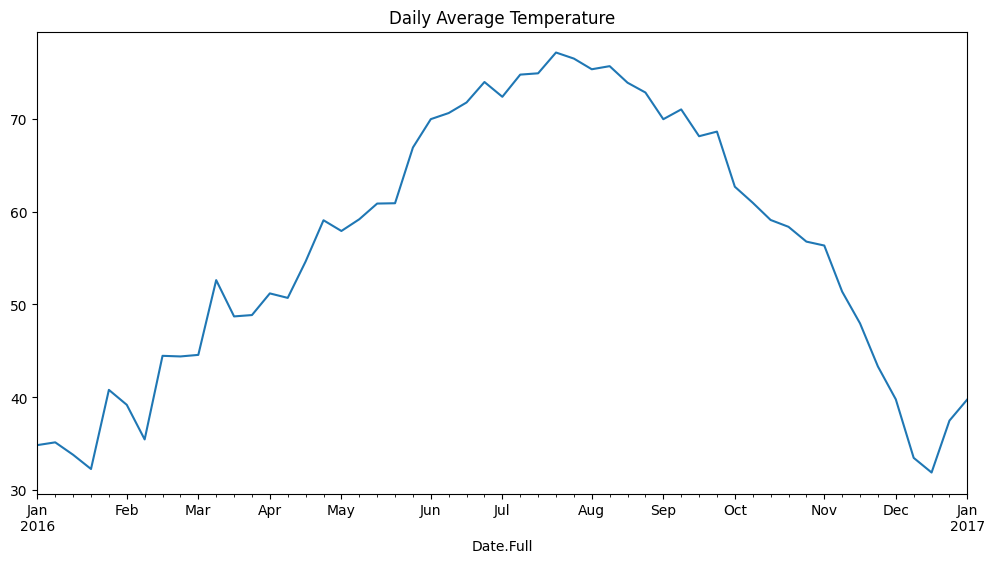

In [2]:
# Load the dataset (ensure the path is correct)
data = pd.read_csv('weather.csv')

# Convert the 'Date.Full' column to datetime
data['Date.Full'] = pd.to_datetime(data['Date.Full'])

# Set the 'Date.Full' as the index
data.set_index('Date.Full', inplace=True)

# Group by date and calculate daily average temperature
daily_avg_temp = data.groupby('Date.Full')['Data.Temperature.Avg Temp'].mean()

# Plot the daily average temperature to visualize the series
daily_avg_temp.plot(figsize=(12, 6))
plt.title('Daily Average Temperature')
plt.show()


In [3]:
# Checking stationarity using ADF Test (Augmented Dickey-Fuller test)
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_avg_temp.dropna())  # Drop NA values before running the test
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value < 0.05, the series is stationary; otherwise, we need differencing


ADF Statistic: -2.8710605184360745
p-value: 0.048818245821697505


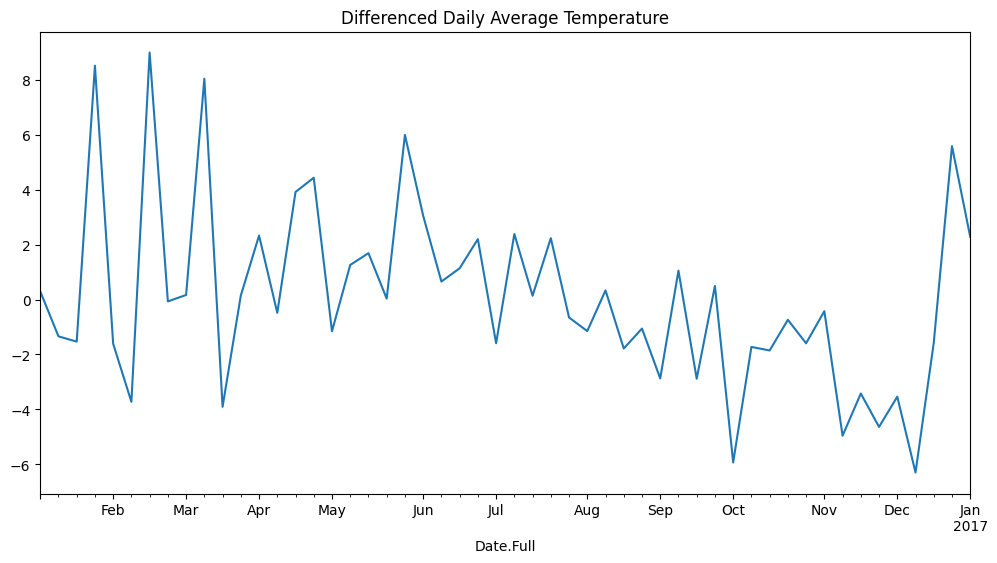

In [4]:
# Perform differencing if series is not stationary
daily_avg_temp_diff = daily_avg_temp.diff().dropna()

# Plot the differenced series
daily_avg_temp_diff.plot(figsize=(12, 6))
plt.title('Differenced Daily Average Temperature')
plt.show()


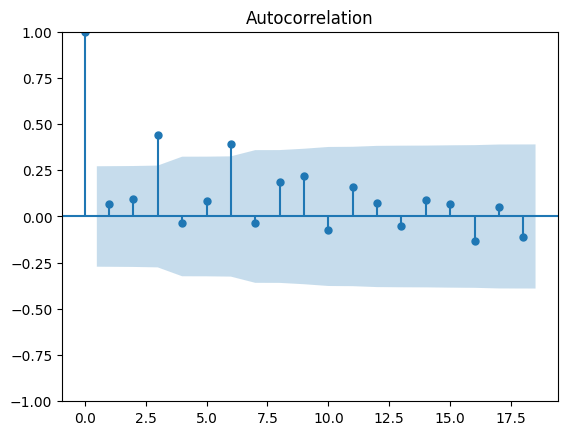

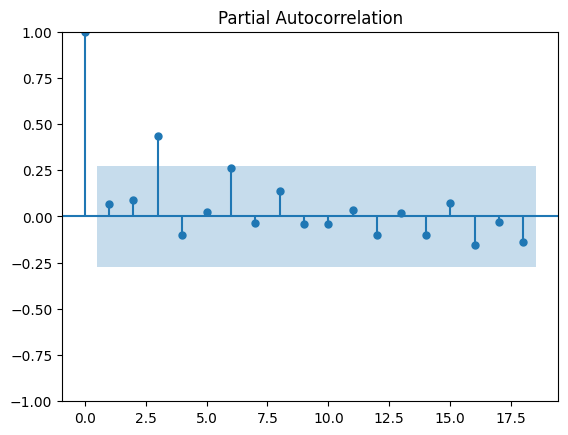

In [5]:
# Plot ACF and PACF to determine p and q (AR and MA components)
plot_acf(daily_avg_temp_diff)
plot_pacf(daily_avg_temp_diff)
plt.show()


In [7]:
# Fit ARIMA model (p=1, d=1, q=1) based on ACF and PACF analysis
model = ARIMA(daily_avg_temp, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()  # Ensure this line is executed


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

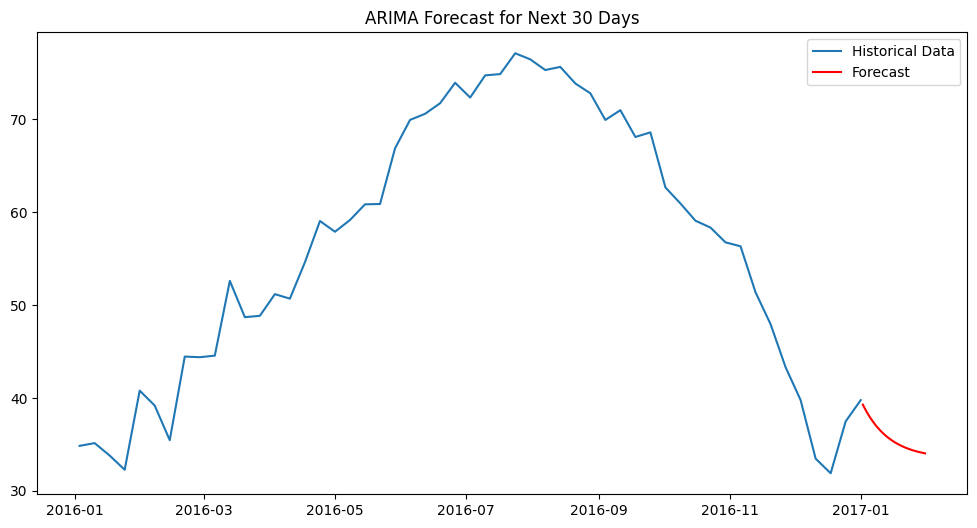

In [8]:
# Ensure that the model has been fitted before proceeding with forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp, label='Historical Data')
plt.plot(pd.date_range(daily_avg_temp.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast for Next {forecast_steps} Days')
plt.legend()
plt.show()
